In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Solve the following initial value differential equation $$ y'=\lambda y,  \quad  y(0)=y_0$$

In [2]:
# 최대 x 범위 : 0 <= x < x_max
x_max = 1
x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
lamb = -2
# 차수, weight 개수
n = 4
# w = [weight1, weight2, weight3, weight4]
w = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))

# analysis 함수 
def anal(x, lamb):
    return np.exp(lamb*x)

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1         # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
        yprime += i*w[i-1]*(x**(i-1))

    return yprime

def f(y, lamb):
    return lamb*y

In [3]:
# lambda 값, 학습률 조정
#lamb = -1
learning_rate = 0.01
EPOCH = 100

# 변화 w 값, loss 저장
w_trace = []
w_trace.append(w.numpy())
loss_trace = []

# 학습 과정
for epoch in range(EPOCH):
    for x_unit, y_unit in zip(x, f(y(x,w), lamb)):
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x_unit, w, n)
            # 오차
            #loss = tf.reduce_mean(tf.square(yprime(x, w) - f(predict, lamb)))
            loss = tf.math.sqrt(tf.square(f(predict, lamb) - yprime(x_unit, w, n)))
            loss_trace.append(loss.numpy())
            gradients = tape.gradient(loss, w)

            w = tf.Variable(w - learning_rate*gradients)
            w_trace.append(w.numpy())


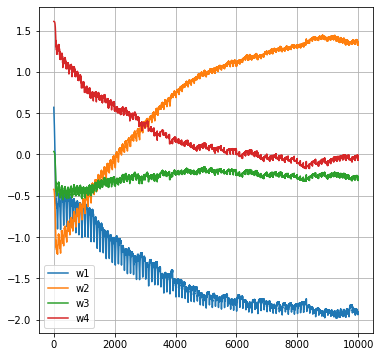

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(w_trace, label = ['w1', 'w2', 'w3', 'w4'])
ax.tick_params(labelsize=10)
ax.legend(fontsize=10)
ax.grid()

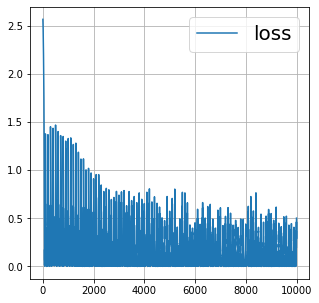

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(loss_trace, label = 'loss')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

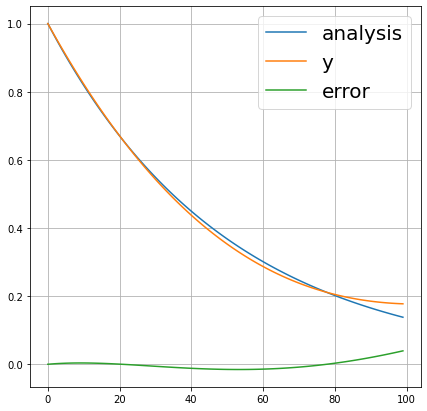

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [7]:
np.exp(1)

2.718281828459045

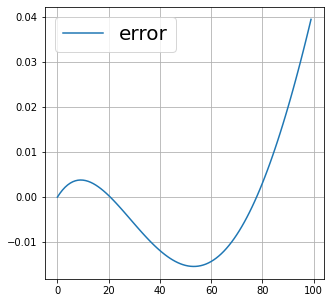

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

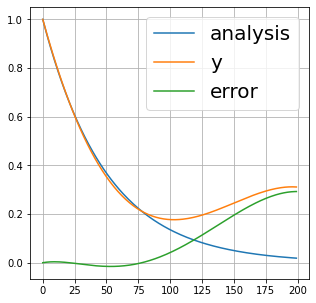

In [9]:
x = tf.Variable([0.01*n for n in range(200)], dtype = tf.float32)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(anal(x,lamb), label = 'analysis')
ax.plot(y(x, w, n), label = 'y')
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

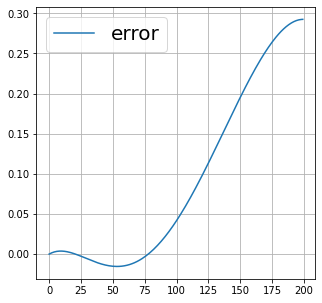

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(y(x, w, n) - anal(x,lamb), label = 'error')
ax.tick_params(labelsize=10)
ax.legend(fontsize=20)
ax.grid()

In [ ]:
# 2022.07.20
# 에러 그래프 부분 보강
# epoch 늘려서 학습 결과 찾기
# w 값 
# w1 = lambda와 비슷하게 -2
# w2 = 2
# w3 = -1
# w4 = 0.5
# layer 구조 확인